In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer = load_breast_cancer()

In [3]:
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(data_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [5]:
lr_clf = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
rf_cf = RandomForestClassifier(random_state=0)

In [6]:
X_train, X_test, y_train, y_test =  train_test_split(cancer.data, cancer.target,  test_size=0.2, random_state=156)

In [9]:
vo_soft_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf), ('RF', rf_cf)], voting='soft')

vo_soft_clf.fit(X_train, y_train)
pred_s = vo_soft_clf.predict(X_test)

In [10]:
vo_hard_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf), ('RF', rf_cf)], voting='hard')

vo_hard_clf.fit(X_train, y_train)
pred_h = vo_hard_clf.predict(X_test)

In [12]:
print('soft 정확도', accuracy_score(y_test, pred_s))
print('hard 정확도', accuracy_score(y_test, pred_h))

soft 정확도 0.9736842105263158
hard 정확도 0.9736842105263158


In [17]:
classifiers = [lr_clf, knn_clf, rf_cf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도 : 0.9561
KNeighborsClassifier 정확도 : 0.9386
RandomForestClassifier 정확도 : 0.9561


## 랜덤 포레스트

In [18]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.random.seed(5)

In [20]:
def cross_validation(classifier, feature, labels):
    cv_scores= []
    
    for i in range(10):
        scores = cross_val_score(classifier, feature, labels, cv=10, scorung='accuracy')
        cv_scores.append(scores.mean())
        
    return cv_scores

In [25]:
feature_name_df = pd.read_csv('features.txt', sep='\s+', header=None, names=['column_index','column_name'])

print(feature_name_df.shape)
feature_name_df.groupby('column_name').count().sort_values('column_index')

(561, 2)


,column_index
column_name,
"angle(X,gravityMean)",1
"tBodyGyro-arCoeff()-Y,3",1
"tBodyGyro-arCoeff()-Y,2",1
"tBodyGyro-arCoeff()-Y,1",1
"tBodyGyro-arCoeff()-X,4",1
...,...
"fBodyAccJerk-bandsEnergy()-25,48",3
"fBodyAccJerk-bandsEnergy()-33,48",3
"fBodyAccJerk-bandsEnergy()-41,48",3


In [33]:
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0] +'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [34]:
def get_human_dataset():
    feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('y_train.txt',sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [35]:
X_train.shape, y_train.shape

((7352, 561), (7352, 1))

In [36]:
X_test.shape, y_test.shape

((2947, 561), (2947, 1))

In [37]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [38]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('rf 정확도 : {0:.4f}'.format(accuracy))

<ipython-input-38-34c073d8929c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


rf 정확도 : 0.9253


In [39]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[50],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

C:\Users\whssk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\whssk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\whssk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\whssk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

최적 하이퍼 파라미터: 
 {'max_depth': 12, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 50}
최고 예측 정확도:0.9173


In [40]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=18,
                                min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

<ipython-input-40-736b2c5a28f0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf1.fit(X_train, y_train)


예측 정확도 : 0.9186


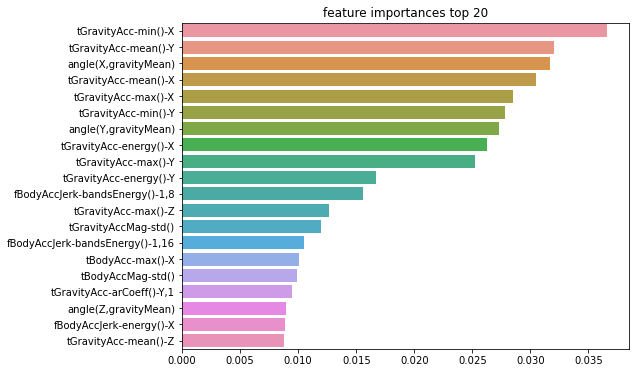

In [42]:
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('feature importances top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 부스팅

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feature_name_df = pd.read_csv('features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

X_train = pd.read_csv('X_train.txt', sep='\s+', header=None)
X_test = pd.read_csv('X_test.txt', sep='\s+', header=None)

y_train = pd.read_csv('y_train.txt', sep='\s+', header=None)
y_test = pd.read_csv('y_test.txt', sep='\s+', header=None)

X_train.columns = feature_name
X_test.columns = feature_name

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import time
import warnings

warnings.filterwarnings('ignore')
start_time = time.time()

clf = AdaBoostClassifier(random_state=10)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("acc:", accuracy_score(y_test, pred))
print('adaboost 수행시간: {:.1f}초'.format(time.time()-start_time) )

acc: 0.5310485239226331
adaboost 수행시간: 20.2초


In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
start_time = time.time()
tree_model = DecisionTreeClassifier(max_depth=20)
clf = AdaBoostClassifier(base_estimator= tree_model, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print('acc:', accuracy_score(y_test, pred))
print('수행시간 : {:.1f}'.format(time.time()- start_time))

acc: 0.8568035290125552
수행시간 : 3.6


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

print('acc:', accuracy_score(y_test, gb_pred))
print('수행시간 : {:.1f}'.format(time.time()- start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100,500],
       'learning_rate':[0.05,0.1]}

start_time = time.time()
grid= GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print('Fit time:', time.time()-start_time)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
from xgboost import XGBClassifier

start_time = time.time()
xgb = XGBClassifier(learning_rate=0.01,n_estimators:100, max_depth=3)
xgb.fit(X_train, y_train)

print('acc:', accuracy_score(y_test, xgb.predict(X_test.values)))
print('수행시간 : {:.1f}'.format(time.time()- start_time))

In [ ]:
from xgboost import XGBClassifier

evals = [(X_test.values, y_test)]

start_time = time.time()
xgb = XGBClassitier(grid.best_params_, max_depth=3)
xgb.fit(X_train.values, y_train, early_stopping_rounds =5, eval_set=evals)

print('acc:', accuracy_score(y_test, xgb.predict(X_test.values)))
print('수행시간 : {:.1f}'.format(time.time()- start_time))

In [ ]:
from lightgbm import LGBMClassifier

start_time = time.time()
lgbm = LGBMClassifier(n_estimators=100)
lgbm.fit(X_train.values, y_train, early_stopping_rounds=10, eval_set=evals)

print('acc:', accuracy_score(y_test, grid.best_estimator_.predict(X_test.values)))
print('수행시간 : {:.1f}'.format(time.time()- start_time))